# Time Series Analysis 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

C:\Programs\WPy64-39100\python-3.9.10.amd64\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


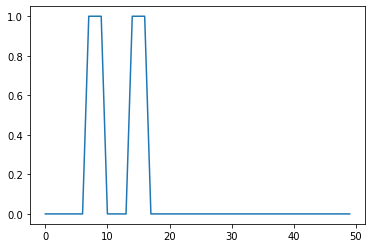

In [2]:
signal = np.zeros(50)
signal[7:10] = 1
signal[14:17] = 1
plt.plot(signal)

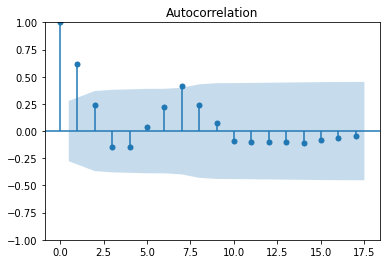

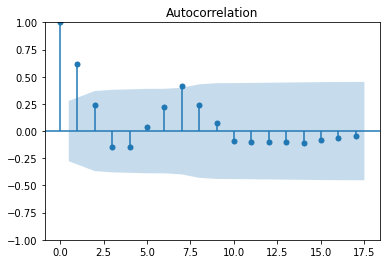

In [3]:
plot_acf(signal)

In [4]:
url = 'https://www.esrl.noaa.gov/gmd/webdata/ccgg/trends/co2/co2_mm_mlo.txt'

In [5]:
df = pd.read_csv(url, skiprows=53, delim_whitespace=True)

In [6]:
df.columns = ['year', 'month', 'time', 'co2', 'deseasoned', 'nr_days', 'std_days', 'uncertainty']

In [7]:
df.head()

,year,month,time,co2,deseasoned,nr_days,std_days,uncertainty
0,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
1,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
2,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
3,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
4,1958,8,1958.6219,314.93,316.18,-1,-9.99,-0.99


<AxesSubplot:xlabel='time'>

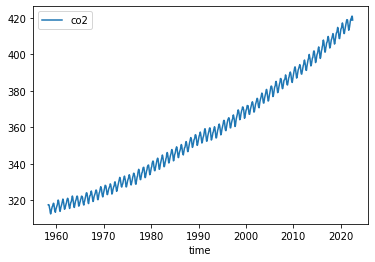

In [8]:
df.plot('time', 'co2')

In [9]:
result_add = seasonal_decompose(df['co2'], model='additive', period=12, extrapolate_trend='freq')

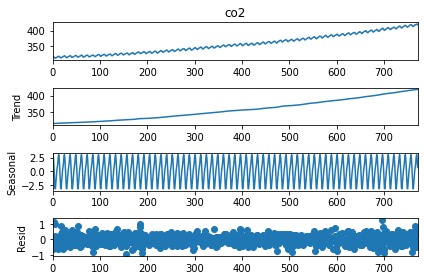

In [10]:
result_add.plot()
pil_kwargs = {'quality': 90}
plt.savefig('TSA_decomposition.jpg', dpi=200, pil_kwargs=pil_kwargs)
plt.show()

In [11]:
%matplotlib inline

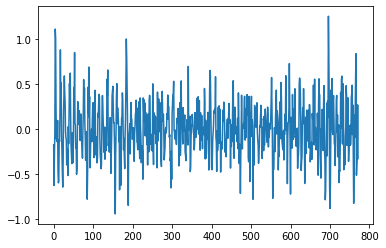

In [12]:
plt.plot(result_add.resid, '-')
# plt.xlim(0, 100)

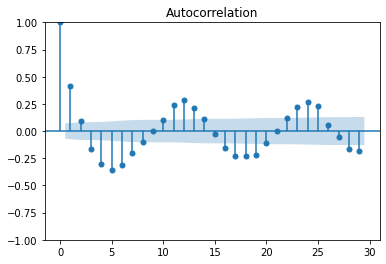

In [13]:
plot_acf(result_add.resid)
plt.show()

C:\Programs\WPy64-39100\python-3.9.10.amd64\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


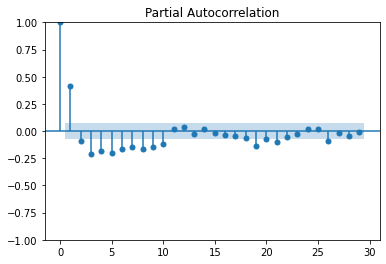

In [14]:
plot_pacf(result_add.resid)
plt.show()

In [28]:
len(result_add.resid)

772

In [15]:
model = ARIMA(result_add.resid, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  772
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -99.025
Date:                Tue, 16 Aug 2022   AIC                            206.050
Time:                        12:19:38   BIC                            224.645
Sample:                             0   HQIC                           213.205
                                - 772                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.016     -0.066      0.948      -0.033       0.031
ar.L1          0.3182      0.079      4.026      0.000       0.163       0.473
ma.L1          0.1149      0.085      1.346      0.1

In [16]:
model = ARIMA(result_add.resid, order=(0,0,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  772
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 -94.300
Date:                Tue, 16 Aug 2022   AIC                            196.601
Time:                        12:19:38   BIC                            215.197
Sample:                             0   HQIC                           203.756
                                - 772                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.016     -0.065      0.948      -0.033       0.031
ma.L1          0.4360      0.036     12.162      0.000       0.366       0.506
ma.L2          0.1964      0.032      6.047      0.0

In [17]:
x = [0, 0]
for ii in range(200):
    x.append(x[-1] - 0.5*x[-2] + float(np.random.randn(1)))


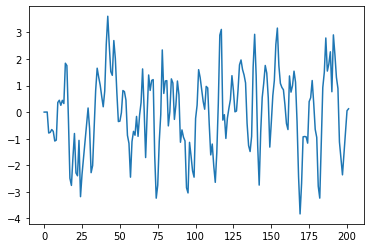

In [18]:
plt.plot(x)

In [19]:
from statsmodels import tsa
np.set_printoptions(precision=2)
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = tsa.arima_process.ArmaProcess(ar, ma)
y = arma_process.generate_sample(250)

In [20]:
model = tsa.arima.model.ARIMA(y, order=(2, 0, 2), trend='n')
fit = model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -353.445
Date:                Tue, 16 Aug 2022   AIC                            716.891
Time:                        12:19:38   BIC                            734.498
Sample:                             0   HQIC                           723.977
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7905      0.142      5.566      0.000       0.512       1.069
ar.L2         -0.2314      0.124     -1.859      0.063      -0.475       0.013
ma.L1          0.7007      0.131      5.344      0.0

In [21]:
fit.params

array([ 0.79, -0.23,  0.7 ,  0.41,  0.98])

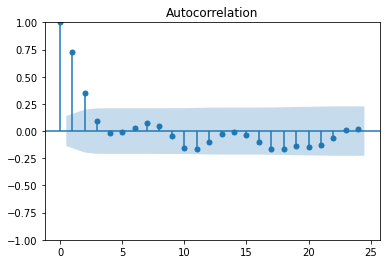

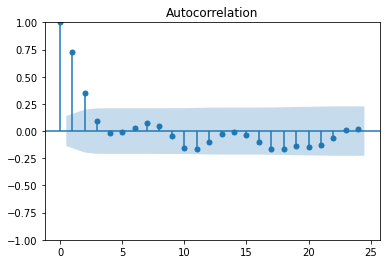

In [22]:
plot_acf(np.array(x))

In [23]:
model = ARIMA(np.array(x), order=(2,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  202
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -277.307
Date:                Tue, 16 Aug 2022   AIC                            562.615
Time:                        12:19:39   BIC                            575.848
Sample:                             0   HQIC                           567.969
                                - 202                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.179     -0.005      0.996      -0.351       0.349
ar.L1          0.9936      0.067     14.921      0.000       0.863       1.124
ar.L2         -0.3718      0.059     -6.266      0.0

ARMA = [[1, 0.9], None]
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -153.340
Date:                Tue, 16 Aug 2022   AIC                            312.680
Time:                        12:19:39   BIC                            320.495
Sample:                             0   HQIC                           315.843
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.061      0.307      0.759      -0.101       0.139
ar.L1         -0.8197      0.059    -13.782      0.000      -0.936      -0.703
sigma2         1.2433      0

C:\Programs\WPy64-39100\python-3.9.10.amd64\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Programs\WPy64-39100\python-3.9.10.amd64\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Programs\WPy64-39100\python-3.9.10.amd64\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.w

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -139.020
Date:                Tue, 16 Aug 2022   AIC                            284.040
Time:                        12:19:39   BIC                            291.856
Sample:                             0   HQIC                           287.203
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1743      0.187     -0.934      0.350      -0.540       0.191
ma.L1          0.9091      0.043     21.211      0.000       0.825       0.993
sigma2         0.9277      0.141      6.593      0.0

C:\Programs\WPy64-39100\python-3.9.10.amd64\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Programs\WPy64-39100\python-3.9.10.amd64\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


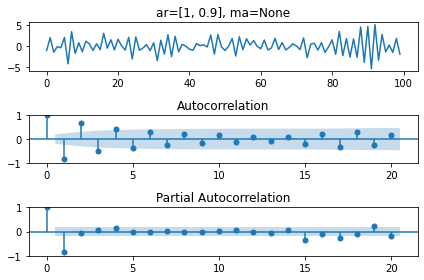

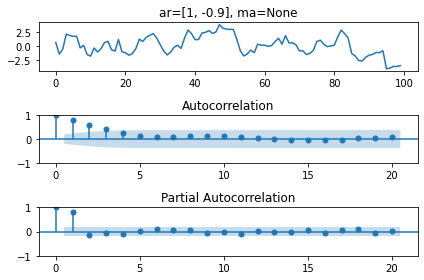

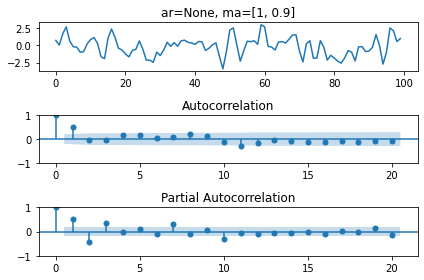

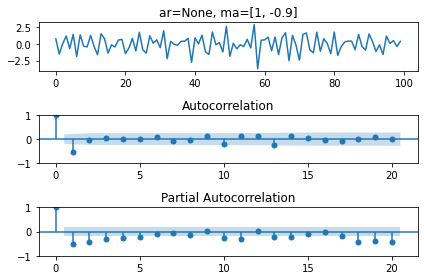

In [24]:
# Define the parameters
ars = [[1, 0.9], [1, -0.9]]
mas = [[1, 0.9], [1, -0.9]]

arma_list = []
for ar in ars:
    ma = None
    arma_list.append([ar, ma])
for ma in mas:
    ar = None
    arma_list.append([ar, ma])

np.random.seed(123)
for arma in arma_list:
    ar = arma[0]
    ma = arma[1]
    # Generate the data
    arma_process = tsa.arima_process.ArmaProcess(ar, ma)
    y = arma_process.generate_sample(100)

    # Fit the model
    print(f'ARMA = {arma}')
    if ar is None:
        model = ARIMA(y, order=(0,0,1))
    else:
        model = ARIMA(y, order=(1,0,0))
        
    model_fit = model.fit()
    print(model_fit.summary())

    # Plotdata,  ACF and PACF
    fig, axs = plt.subplots(3,1)
    axs[0].plot(y)
    axs[0].set_title(f'ar={ar}, ma={ma}')
    plot_acf(y, ax=axs[1]);
    plot_pacf(y, ax=axs[2])
    plt.tight_layout()

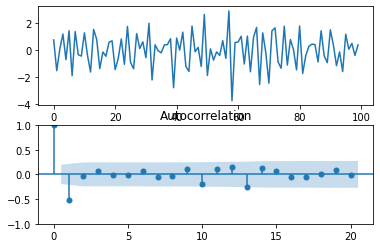

In [25]:
fig, axs = plt.subplots(2,1)
axs[0].plot(y)
plot_acf(y, ax=axs[1]);

In [26]:
x = [1]
len(x)

1

In [27]:
y = None
len(y)

TypeError: object of type 'NoneType' has no len()

In [ ]:
len([y])

In [ ]:
len[x]

In [ ]:
y is None
